In [0]:
from keras import backend as K
import time

import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

### CIFAR 10 dataset imported



In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


## 10 classes are imported

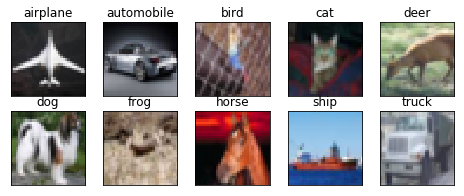

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### 

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.layers import GlobalAveragePooling2D,SeparableConv2D,DepthwiseConv2D,Conv2DTranspose

In [0]:
def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten,BatchNormalization
from keras.layers.convolutional import Conv2D,DepthwiseConv2D
from keras.layers.pooling import MaxPooling2D

from keras import layers

In [0]:
cardinality = 1

In [0]:
def grouped_convolution_1(y, nb_channels, _strides):
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append((layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same'))(group))
            groups.append(layers.Conv2D(_d, kernel_size=(5, 5), strides=_strides, padding='same')(group))
        
        
#         for j in range(cardinality):
#             group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
#             groups.append(layers.Conv2D(_d, kernel_size=(5, 5), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

In [0]:
def grouped_convolution_2(y, nb_channels, _strides):
        
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides,dilation_rate=(1, 1), padding='same')(group))
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides,dilation_rate=(2, 2), padding='same')(group))
        

            
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

In [0]:
from keras.layers import Flatten,BatchNormalization,concatenate,merge,Add,Concatenate

In [0]:
from keras.layers import *

In [0]:
import tensorflow as tf
def space_to_depth_x2(x):
  return tf.space_to_depth(x,block_size=2)
def space_to_depth_x4(x):
  return tf.space_to_depth(x,block_size=4)

In [109]:
_input_ = Input(shape=(32,32,3))


# convolution 1

x1 = SeparableConv2D(32, (5, 5), activation='relu',  border_mode='same')(_input_)
x1 = BatchNormalization(name='Batch_norm_1')(x1)

# convolution 2

x2 = Conv2D(32, (5, 5), activation='relu', border_mode='same')(x1)
x2 = BatchNormalization(name='Batch_norm_2')(x2)


# convolution 3

x3 = Conv2D(32, (5, 5), activation='relu', border_mode='same')(x2)
x3 = BatchNormalization(name='Batch_norm_3')(x3)

# convolution 4

x4 = concatenate([x3, x1],axis=-1)
x4 = SeparableConv2D(32, (5, 5), activation='relu',  border_mode='same')(x4)  
x4 = BatchNormalization(name='Batch_norm_4')(x4)
# maxpool

pool21 = concatenate([x4 ,x1],axis=-1)
pool21 = MaxPooling2D(pool_size=(2, 2))(pool21)

# convolution 5


x5 = SeparableConv2D(32, (3, 3), activation='relu', border_mode='same')(pool21)
x5 = BatchNormalization(name='Batch_norm_5')(x5)

# convolution 6

layer_6_1_to_soft = Lambda(space_to_depth_x2)(x1)
layer_6_4_to_soft = Lambda(space_to_depth_x2)(x4)
x6_skip_connect = concatenate([x5, layer_6_1_to_soft,layer_6_4_to_soft],axis=-1)


x6 = SeparableConv2D(32, (3, 3), activation='relu',  border_mode='same')(x6_skip_connect)
x6 = BatchNormalization(name='Batch_norm_6')(x6)
# convolution 7

#x7 = Concatenate([x6,x4,x5])


layer_7_4_to_soft = Lambda(space_to_depth_x2)(x4)
layer_7_3_to_soft = Lambda(space_to_depth_x2)(x3)

x7_skip_connect = concatenate([x6, layer_7_4_to_soft,x5,layer_7_3_to_soft],axis=-1)
x7 = Conv2D(32, (5, 5), activation='relu',  border_mode='same' )(x7_skip_connect)
x7 = BatchNormalization(name='Batch_norm_7')(x7)
# convolution 8


# x8 = Concatenate([x7,x1,x3,x5,x6])

layer_8_1_to_soft = Lambda(space_to_depth_x2)(x1)
layer_8_3_to_soft = Lambda(space_to_depth_x2)(x3)


x8_skip_connect = concatenate([x7, layer_8_1_to_soft,layer_8_3_to_soft,x5,x6],axis=-1)
x8 = SeparableConv2D(32, (3, 3), activation='relu',  border_mode='same' )(x8_skip_connect)
x8 = BatchNormalization(name='Batch_norm_8')(x8)
# maxpool 

# pool31 = Concatenate([x8,x1,x3,x5,x6])


layer_mapool_2_1_to_soft = Lambda(space_to_depth_x2)(x1)
layer_mapool_2_3_to_soft = Lambda(space_to_depth_x2)(x3)


max_pool_2_skip_connect = concatenate([x8, layer_mapool_2_1_to_soft,layer_mapool_2_3_to_soft,x5,x6,x7],axis=-1)
pool31 = MaxPooling2D(pool_size=(2, 2))(max_pool_2_skip_connect)


# convolution x9

# x9 = Concatenate([pool31,x6])

layer_9_pool31_to_soft = Lambda(space_to_depth_x2)(pool31)
layer_9_6_to_soft = Lambda(space_to_depth_x2)(x6)

pool31_skip_connect = concatenate([pool31, layer_9_6_to_soft],axis=-1)


x9 = Conv2D(32, (5, 5), activation='relu',  border_mode='same' )(pool31_skip_connect)
x9 = BatchNormalization(name='Batch_norm_9')(x9)

# convolution x10

# x10 = Concatenate([x9, x2,x4,x7])

layer_10_9_1_to_soft = Lambda(space_to_depth_x2)(x9)
layer_10_2_3_to_soft = Lambda(space_to_depth_x4)(x2)
layer_10_4_3_to_soft = Lambda(space_to_depth_x4)(x4)
layer_10_2_7_to_soft = Lambda(space_to_depth_x2)(x7)


layer_10_skip_connect = concatenate([x9, layer_10_2_3_to_soft,layer_10_4_3_to_soft,layer_10_2_7_to_soft],axis=-1)
x10 = SeparableConv2D(32, (3, 3), activation='relu',  border_mode='same' )(layer_10_skip_connect)
x10 = BatchNormalization(name='Batch_norm_10')(x10)
# convolution x11

# x11 = Concatenate([x10, x2,x3,x5,x7])


layer_11_2_to_soft = Lambda(space_to_depth_x4)(x2)
layer_11_3_to_soft = Lambda(space_to_depth_x4)(x3)
layer_11_4_to_soft = Lambda(space_to_depth_x4)(x4)
layer_11_5_to_soft = Lambda(space_to_depth_x2)(x5)
layer_11_7_to_soft = Lambda(space_to_depth_x2)(x7)
layer_11_9_to_soft = Lambda(space_to_depth_x2)(x9)

layer_11_skip_connect = concatenate([x10, layer_11_2_to_soft,layer_11_3_to_soft,layer_11_5_to_soft,layer_11_7_to_soft,layer_11_4_to_soft,x9],axis=-1)

x11 = Conv2D(32, (5, 5), activation='relu', border_mode='same' )(layer_11_skip_connect)
x11 = BatchNormalization(name='Batch_norm_11')(x11)
# convolution x12

# x12 = Concatenate([x11, x1,x3,x5,x7])


layer_12_1_to_soft = Lambda(space_to_depth_x4)(x1)
layer_12_3_to_soft = Lambda(space_to_depth_x4)(x3)
layer_12_5_to_soft = Lambda(space_to_depth_x2)(x5)
layer_12_7_to_soft = Lambda(space_to_depth_x2)(x7)
layer_12_4_to_soft = Lambda(space_to_depth_x4)(x4)

layer_12_skip_connect = concatenate([x11, layer_12_1_to_soft,layer_12_3_to_soft,layer_12_5_to_soft,layer_11_7_to_soft,layer_12_4_to_soft],axis=-1)

x12 = SeparableConv2D(32, (3, 3), activation='relu',  border_mode='same' )(layer_12_skip_connect)
x12 = BatchNormalization(name='Batch_norm_12')(x12)




layer_softmax_4_to_soft = Lambda(space_to_depth_x4)(x4)
layer_softmax_7_to_soft = Lambda(space_to_depth_x2)(x7)


layer_softmax_skip_connect = concatenate([layer_softmax_4_to_soft, layer_softmax_7_to_soft,x10,x12],axis=-1)
conv23 = Conv2D(10, (1, 1))(layer_softmax_skip_connect)

gpool = GlobalAveragePooling2D()(conv23)

output = Activation(activation='softmax')(gpool)

model = Model(inputs=[_input_], outputs=output)


print(model.summary())
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (5, 5), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", pad

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_75 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_412 (Separable (None, 32, 32, 32)   203         input_75[0][0]                   
__________________________________________________________________________________________________
Batch_norm_1 (BatchNormalizatio (None, 32, 32, 32)   128         separable_conv2d_412[0][0]       
__________________________________________________________________________________________________
conv2d_328 (Conv2D)             (None, 32, 32, 32)   25632       Batch_norm_1[0][0]               
__________________________________________________________________________________________________
Batch_norm

In [0]:
!ls

sample_data


In [0]:
!ls

## Cyclic Learning rate

In [0]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())


In [0]:
clr = CyclicLR(base_lr=0.009, max_lr=0.09,step_size=2000., mode='triangular2')
#model.fit(X_train, Y_train, callbacks=[clr])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<__main__..., verbose=1, steps_per_epoch=390, epochs=10)`


Epoch 1/10
  3/390 [..............................] - ETA: 10:03 - loss: 2.8586 - acc: 0.1354

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.695065). Check your callbacks.
  % delta_t_median)


390/390 [==============================] - 53s 135ms/step - loss: 1.6925 - acc: 0.3865 - val_loss: 1.7837 - val_acc: 0.4090
Epoch 2/10
390/390 [==============================] - 47s 121ms/step - loss: 1.3230 - acc: 0.5295 - val_loss: 1.5574 - val_acc: 0.5221
Epoch 3/10
390/390 [==============================] - 47s 121ms/step - loss: 1.1536 - acc: 0.5911 - val_loss: 1.6479 - val_acc: 0.5044
Epoch 4/10
390/390 [==============================] - 47s 121ms/step - loss: 1.0463 - acc: 0.6331 - val_loss: 2.1654 - val_acc: 0.3736
Epoch 5/10
390/390 [==============================] - 47s 121ms/step - loss: 0.9828 - acc: 0.6580 - val_loss: 1.2837 - val_acc: 0.6198
Epoch 6/10
390/390 [==============================] - 47s 121ms/step - loss: 0.9438 - acc: 0.6702 - val_loss: 1.3546 - val_acc: 0.5775
Epoch 7/10
390/390 [==============================] - 47s 121ms/step - loss: 0.8642 - acc: 0.7016 - val_loss: 1.1382 - val_acc: 0.6456
Epoch 8/10
390/390 [==============================] - 47s 121ms/st

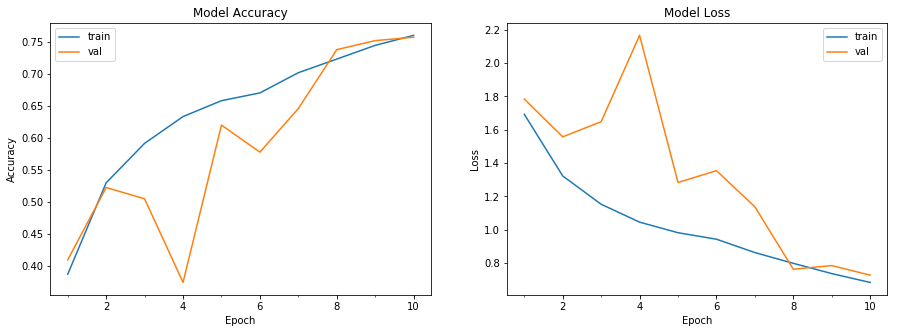

Accuracy on test data is: 75.73


In [110]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.3, 
                             
                            rotation_range=30,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)


# train the model
start = time.time()
# Train the model

# Features are fed to the generator 
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels),callbacks=[clr], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [111]:

# Features are fed to the generator 
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 20, 
                                 validation_data = (test_features, test_labels),callbacks=[clr], verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<__main__..., verbose=1, steps_per_epoch=390, epochs=20)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
390/390 [==============================] - 47s 122ms/step - loss: 0.6455 - acc: 0.7761 - val_loss: 0.6020 - val_acc: 0.7961
Epoch 2/20
390/390 [==============================] - 47s 121ms/step - loss: 0.6387 - acc: 0.7773 - val_loss: 0.6774 - val_acc: 0.7749
Epoch 3/20
390/390 [==============================] - 47s 121ms/step - loss: 0.6404 - acc: 0.7792 - val_loss: 0.6848 - val_acc: 0.7851
Epoch 4/20
390/390 [==============================] - 47s 121ms/step - loss: 0.6562 - acc: 0.7716 - val_loss: 0.7508 - val_acc: 0.7615
Epoch 5/20
390/390 [==============================] - 47s 121ms/step - loss: 0.6598 - acc: 0.7738 - val_loss: 0.9075 - val_acc: 0.7013
Epoch 6/20
390/390 [==============================] - 47s 121ms/step - loss: 0.6628 - acc: 0.7703 - val_loss: 0.7751 - val_acc: 0.7512
Epoch 7/20
390/390 [==============================] - 47s 121ms/step - loss: 0.6371 - acc: 0.7803 - val_loss: 0.7131 - val_acc: 0.7801
Epoch 8/20
390/390 [==============================] - 4

In [112]:

# Features are fed to the generator 
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 70, 
                                 validation_data = (test_features, test_labels),callbacks=[clr], verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<__main__..., verbose=1, steps_per_epoch=390, epochs=70)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/70
390/390 [==============================] - 47s 122ms/step - loss: 0.4616 - acc: 0.8390 - val_loss: 0.4899 - val_acc: 0.8392
Epoch 2/70
390/390 [==============================] - 47s 121ms/step - loss: 0.4578 - acc: 0.8399 - val_loss: 0.5151 - val_acc: 0.8334
Epoch 3/70
390/390 [==============================] - 47s 121ms/step - loss: 0.4517 - acc: 0.8413 - val_loss: 0.5358 - val_acc: 0.8370
Epoch 4/70
390/390 [==============================] - 47s 121ms/step - loss: 0.4589 - acc: 0.8399 - val_loss: 0.5235 - val_acc: 0.8295
Epoch 5/70
390/390 [==============================] - 47s 121ms/step - loss: 0.4616 - acc: 0.8410 - val_loss: 0.5318 - val_acc: 0.8318
Epoch 6/70
390/390 [==============================] - 47s 121ms/step - loss: 0.4557 - acc: 0.8422 - val_loss: 0.7661 - val_acc: 0.7725
Epoch 7/70
390/390 [==============================] - 47s 121ms/step - loss: 0.4533 - acc: 0.8403 - val_loss: 0.4765 - val_acc: 0.8470
Epoch 8/70
390/390 [==============================] - 4

In [0]:
# _input_ = Input(shape=(32,32,3))


# x1 = SeparableConv2D(32, (5, 5), activation='relu', padding = 'same')(_input_)


# # convolution 2

# x2 = Conv2D(32, (5, 5), activation='relu', padding = 'same')(x1)


# # convolution 3

# x3 = Conv2D(32, (5, 5), activation='relu', padding = 'same')(x2)

# # convolution 4

# x4 = concatenate([x3, x1])
# x4 = SeparableConv2D(32, (5, 5), activation='relu', padding = 'same')(x3)


# pool21 = Concatenate([x4, x1])
# pool21 = MaxPooling2D(pool_size=(2, 2))(x4)


# x5 = SeparableConv2D(32, (3, 3), activation='relu', padding = 'same')(pool21)

# x6 = Concatenate([x5,x1,x4])
# x6 = SeparableConv2D(32, (3, 3), activation='relu', padding = 'same')(x5)


# x7 = Concatenate([x6,x7,x4,x5])
# x7 = Conv2D(32, (5, 5), activation='relu', padding = 'same')(x6)

# x8 = Concatenate([x7,x1,x3,x5,x6])
# x8 = SeparableConv2D(32, (3, 3), activation='relu', padding = 'same')(x7)


# pool31 = Concatenate([x8,x1])
# pool31 = MaxPooling2D(pool_size=(2, 2))(x8)


# x9 = Conv2D(32, (5, 5), activation='relu', padding = 'same')(pool31)

# x10 = Concatenate([x9, x2])
# x10 = SeparableConv2D(32, (3, 3), activation='relu', padding = 'same')(x9)

# x11 = Concatenate([x10, x2])
# x11 = Conv2D(32, (5, 5), activation='relu', padding = 'same')(pool31)


# x12 = SeparableConv2D(32, (3, 3), activation='relu', padding = 'same')(x11)

# conv23 = Conv2D(10, (1, 1))(x12)
# gpool = GlobalAveragePooling2D()(conv23)
# output = Activation(activation='softmax')(gpool)

# model = Model(inputs=[_input_], outputs=output)


# print(model.summary())
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0, 
#                              horizontal_flip=False)

# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                  samples_per_epoch = train_features.shape[0], nb_epoch = 5, 
#                                  validation_data = (test_features, test_labels), verbose=1)

